In [1]:
#part0 load data
import pandas as pd
from collections import Counter
import numpy as np
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

census_column_names=['age','workclass','fnlwgt','education','education-num',
                      'marital-status','occupation','relationship','race','sex',
                      'capital-gain','capital-loss','hours-per-week','native-country',
                      'annual-income']
CENSUS_FILE = './census_dataset.csv'
org_dataFile = pd.read_csv(CENSUS_FILE,names=census_column_names)
#number of features & type of features
org_dataFile.info()
#Classes
org_dataFile['annual-income'].value_counts()
org_dataFile['annual-income'].value_counts()/len(org_dataFile)
print("Not balanced")
#undersampling ??
#df2 = dataFile.copy()
#preprocess string features        
def labelizedString(df2):
    le = preprocessing.LabelEncoder()
    for column_name in df2.columns:
        if df2[column_name].dtype == object:
            df2[column_name] = le.fit_transform(df2[column_name])
        else:
            pass
dataFile = org_dataFile.copy()
labelizedString(dataFile)
#Standardize
'''
ss = preprocessing.StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(dataFile),columns = dataFile.columns)
df_scaled.head()
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27482 entries, 0 to 27481
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27482 non-null  int64 
 1   workclass       27482 non-null  object
 2   fnlwgt          27482 non-null  int64 
 3   education       27482 non-null  object
 4   education-num   27482 non-null  int64 
 5   marital-status  27482 non-null  object
 6   occupation      27482 non-null  object
 7   relationship    27482 non-null  object
 8   race            27482 non-null  object
 9   sex             27482 non-null  object
 10  capital-gain    27482 non-null  int64 
 11  capital-loss    27482 non-null  int64 
 12  hours-per-week  27482 non-null  int64 
 13  native-country  27482 non-null  object
 14  annual-income   27482 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.1+ MB
Not balanced


'\nss = preprocessing.StandardScaler()\ndf_scaled = pd.DataFrame(ss.fit_transform(dataFile),columns = dataFile.columns)\ndf_scaled.head()\n'

In [2]:
#part0(2)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer

def MySplit(n_splits,test_size,df):
  split = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=23721266)
  for train_index, test_valid_index in split.split(df, df['annual-income']):
     set1 = df.iloc[train_index]
     set2 = df.iloc[test_valid_index]
     return set1,set2

# stratified split 60%/20%/20% 
train_set,test_valid_set = MySplit(1,0.4,dataFile)
test_set,valid_set = MySplit(1,0.5,test_valid_set)
  
print(train_set['annual-income'].value_counts()/len(train_set))
print(test_set['annual-income'].value_counts()/len(test_set))

def myStd(df):
    ss = preprocessing.StandardScaler()
    annualIncome = df.loc[:,'annual-income']
    tempDf = df.drop('annual-income', axis = 1)
    df_scaled = pd.DataFrame(ss.fit_transform(tempDf),columns = tempDf.columns, index=tempDf.index)
    df_scaled['annual-income'] = annualIncome
    return df_scaled  


train_set.head()
std_train_set = myStd(train_set)
std_test_set = myStd(test_set)
std_valid_set = myStd(valid_set)
std_train_set.head()

0    0.724665
1    0.275335
Name: annual-income, dtype: float64
0    0.724709
1    0.275291
Name: annual-income, dtype: float64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
5252,74,1,168782,5,4,6,7,1,4,0,0,0,35,37,0
23966,42,3,54102,15,10,0,0,4,4,0,0,0,40,37,0
12123,50,3,175045,11,12,2,9,0,4,1,0,0,41,37,1
13376,33,3,156464,11,9,0,2,1,4,1,0,0,40,37,0
13164,56,3,205735,3,2,5,6,4,4,1,0,0,40,37,0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
5252,2.582376,-1.652415,-0.190218,-1.396191,-2.410379,2.287916,0.134561,-0.236923,0.379941,-1.472178,-0.155865,-0.21553,-0.440432,0.251142,0
23966,0.233641,-0.229315,-1.291708,1.236797,-0.060311,-1.744304,-1.491600,1.659495,0.379941,-1.472178,-0.155865,-0.21553,-0.042333,0.251142,0
12123,0.820825,-0.229315,-0.130063,0.183602,0.723045,-0.400230,0.599179,-0.869062,0.379941,0.679266,-0.155865,-0.21553,0.037287,0.251142,1
13376,-0.426940,-0.229315,-0.308531,0.183602,-0.451989,-1.744304,-1.026982,-0.236923,0.379941,0.679266,-0.155865,-0.21553,-0.042333,0.251142,0
13164,1.261213,-0.229315,0.164712,-1.922789,-3.193735,1.615879,-0.097747,1.659495,0.379941,0.679266,-0.155865,-0.21553,-0.042333,0.251142,0


naive_bayes


0.7652374310146158

0.7581877729257642

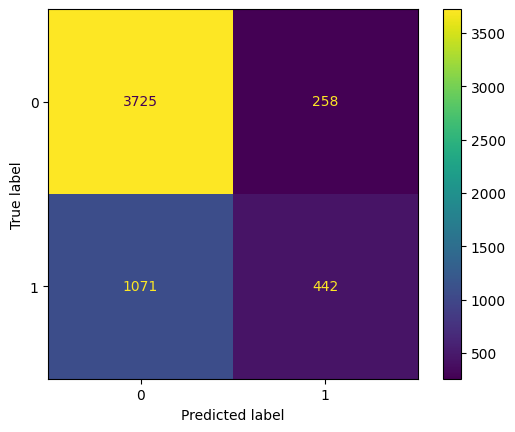

In [3]:
#part 1
#peformance metric functions
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import svm 

#separate features and labels
X_train = train_set.drop('annual-income',axis=1)
Y_train = train_set['annual-income']
X_test = test_set.drop('annual-income',axis=1)
Y_test = test_set['annual-income']


#naive_bayes model 
print("naive_bayes")
gnb = GaussianNB()
Y_pred_train = gnb.fit(X_train,Y_train).predict(X_train)
accuracy_score(Y_train,Y_pred_train)

Y_pred_test = gnb.predict(X_test)
accuracy_score(Y_test,Y_pred_test)

gnb_cm = confusion_matrix(Y_test,Y_pred_test)
disp=ConfusionMatrixDisplay(confusion_matrix=gnb_cm,
                            display_labels=gnb.classes_)
disp.plot()
plt.show()



Random Forest:


0.9999393535083996

0.8531659388646288

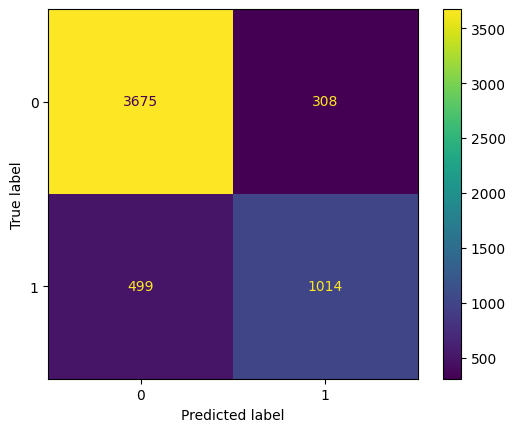

In [4]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
print("Random Forest:")
rf = RandomForestClassifier(random_state=23721266)
rf_Y_pred_train = rf.fit(X_train,Y_train).predict(X_train)
accuracy_score(Y_train,rf_Y_pred_train)

rf_Y_pred_test = rf.predict(X_test)
accuracy_score(Y_test,rf_Y_pred_test)

rf_cm = confusion_matrix(Y_test,rf_Y_pred_test)
rf_disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                            display_labels=rf.classes_)
rf_disp.plot()
plt.show()

SVM:


SVC()

0.8535387227848868

0.8402474526928675

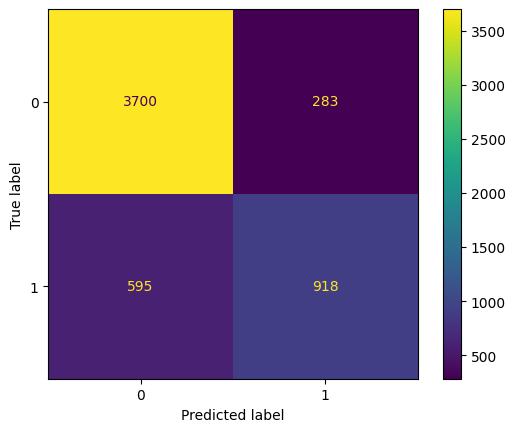

In [5]:
#Support Vector Machine (SVM)
print("SVM:")
std_X_train = std_train_set.drop('annual-income',axis=1)
std_Y_train = std_train_set['annual-income']
std_X_test = std_test_set.drop('annual-income',axis=1)
std_Y_test = std_test_set['annual-income']

svc_model = svm.SVC()
svc_model.fit(std_X_train,std_Y_train)
svc_Y_pred_train = svc_model.predict(std_X_train)
accuracy_score(std_Y_train,svc_Y_pred_train)

svc_Y_pred_test = svc_model.predict(std_X_test)
accuracy_score(std_Y_test,svc_Y_pred_test)

svc_cm = confusion_matrix(std_Y_test,svc_Y_pred_test)
svc_disp =ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                            display_labels=svc_model.classes_)
svc_disp.plot()
plt.show()


naive_bayes
auc: 0.6136797682284542
f1: 0.3994577496610935
accuracy: 0.7581877729257642
sensitivity: 0.29213483146067415
specificity: 0.935224704996234
precision: 0.6314285714285715


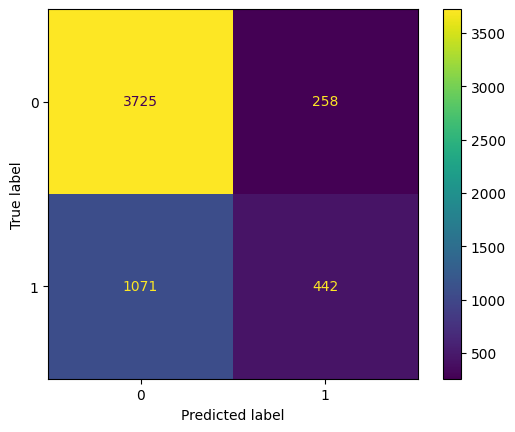

SVM
auc: 0.7678448010787421
f1: 0.6764922623434045
accuracy: 0.8402474526928675
sensitivity: 0.6067415730337079
specificity: 0.928948029123776
precision: 0.7643630308076603


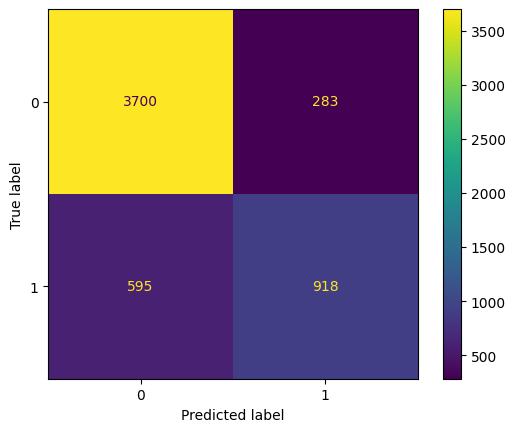

Random forest
auc: 0.7964315127129029
f1: 0.7153439153439153
accuracy: 0.8531659388646288
sensitivity: 0.6701916721744877
specificity: 0.9226713532513181
precision: 0.7670196671709532


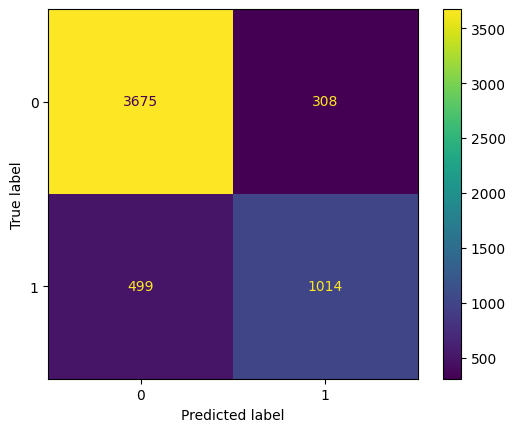

In [6]:
#part1 (2)

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['auc','f1','accuracy','sensitivity','specificity', 'precision']

def p1_metrics(y_true,y_pred,include_cm=True):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    if include_cm:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp),
            'confusion_matrix': cm}
    else:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp)}

def outputP1_metrics(m,modelName):
    print(modelName)
    for i in m:
        if i != 'confusion_matrix':
            print(str(i) +": "+ str(m[i]))
        else:
            disp = ConfusionMatrixDisplay(confusion_matrix=m[i],
                            display_labels=gnb.classes_)
            disp.plot()
            plt.show()

            
NBperformance = p1_metrics(Y_test,Y_pred_test)
RFperformance = p1_metrics(Y_test,rf_Y_pred_test)
SVMperformance = p1_metrics(Y_test,svc_Y_pred_test)
outputP1_metrics(NBperformance,"naive_bayes")
outputP1_metrics(SVMperformance,"SVM")
outputP1_metrics(RFperformance,"Random forest")


naive_bayes
auc: 0.6372647656105158
f1: 0.4453551912568306
accuracy: 0.7784245952337638
sensitivity: 0.3229854689564069
specificity: 0.9515440622646246
precision: 0.717008797653959


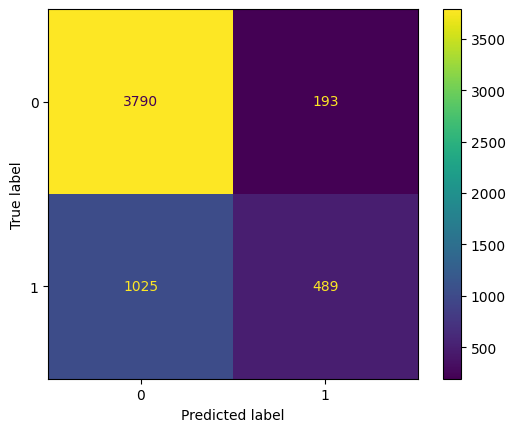

SVM
auc: 0.7777161257670065
f1: 0.6892086330935252
accuracy: 0.8428233581953793
sensitivity: 0.6327608982826949
specificity: 0.9226713532513181
precision: 0.7567140600315956


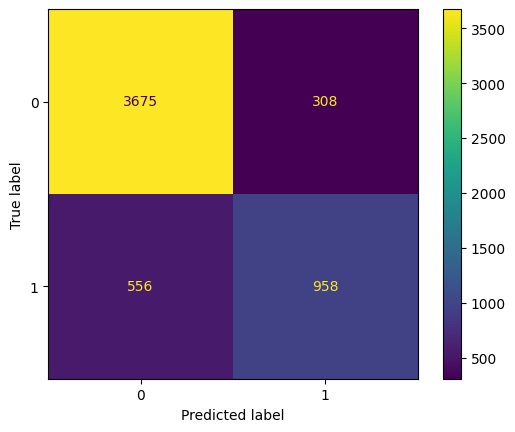

Random forest
auc: 0.7977088723508199
f1: 0.7157821229050279
accuracy: 0.8519192286701838
sensitivity: 0.6770145310435931
specificity: 0.9184032136580467
precision: 0.7592592592592593


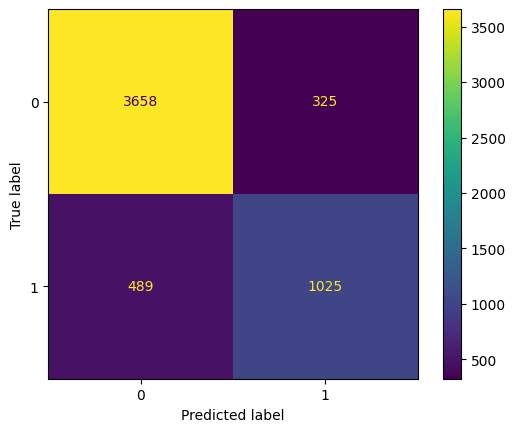

In [7]:
#part 1(3) 

X_valid = valid_set.drop('annual-income',axis=1)
Y_valid = valid_set['annual-income']
std_X_valid = std_valid_set.drop('annual-income',axis=1) 
std_Y_valid = std_valid_set['annual-income']

#NB
Y_pred_valid = gnb.predict(X_valid)
gnb_validP1 = p1_metrics(Y_valid,Y_pred_valid)
outputP1_metrics(gnb_validP1,"naive_bayes")

#SVM
SVC_Y_pred_valid = svc_model.predict(std_X_valid)
SVM_validP1 = p1_metrics(std_Y_valid,SVC_Y_pred_valid)
outputP1_metrics(SVM_validP1,"SVM")

#RF
RF_Y_pred_valid = rf.predict(X_valid)
RF_validP1 = p1_metrics(Y_valid,RF_Y_pred_valid)
outputP1_metrics(RF_validP1,"Random forest")

# Compare and contrast the errors each model makes in terms of each class.

In [8]:
#part 2
from sklearn.model_selection import StratifiedKFold

mergeDataSet = pd.concat([train_set, valid_set])
XmergeDataSet = mergeDataSet.drop('annual-income',axis=1)
YmergeDataSet = mergeDataSet['annual-income']

std_mergeDataSet = pd.concat([std_train_set,std_valid_set])
std_XmergeDataSet = std_mergeDataSet.drop('annual-income',axis=1)
std_YmergeDataSet = std_mergeDataSet['annual-income']

skf = StratifiedKFold(n_splits=5,random_state=23721266,shuffle=True)
NBscores = []
svc_modelscores = []
rfscores = []

def p1_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p1_metrics(y_true,y_pred,include_cm=False)

def StratifiedKFoldTraining(model,matrixlist,X,Y):
  for train_index, test_index in skf.split(X,Y):
    this_X_train, this_X_test = X.iloc[train_index], X.iloc[test_index]
    this_y_train, this_y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(this_X_train, this_y_train)
    matrixlist.append(p1_metrics_scorer(model,this_X_test, this_y_test))
    #print(model.score(this_X_test, this_y_test))

StratifiedKFoldTraining(gnb,NBscores,XmergeDataSet,YmergeDataSet)
StratifiedKFoldTraining(svc_model,svc_modelscores,std_XmergeDataSet,std_YmergeDataSet)
StratifiedKFoldTraining(rf,rfscores,XmergeDataSet,YmergeDataSet)

In [9]:
#part 2(2,3)
def collate_cv_results(cv_results,display=True):
    cv_stats=dict()
    for k in cv_results:
        cv_stats[k+"_mean"]=np.mean(cv_results[k])
        cv_stats[k+"_std"]=np.std(cv_results[k])
        if display:
            print(k,cv_stats[k+"_mean"],"("+str(cv_stats[k+"_std"])+")")
    return cv_stats

collate_cv_results(pd.json_normalize(NBscores))
collate_cv_results(pd.json_normalize(svc_modelscores))
collate_cv_results(pd.json_normalize(rfscores))

auc 0.6279052367725227 (0.0048893978163539785)
f1 0.4263203685422635 (0.010936495256538678)
accuracy 0.771308799883504 (0.0026138716572843552)
sensitivity 0.3087226593690072 (0.010867863042942748)
specificity 0.947087814176038 (0.002692817194564521)
precision 0.6892221458324321 (0.009437639766481104)


{'auc_mean': 0.6279052367725227,
 'auc_std': 0.0048893978163539785,
 'f1_mean': 0.4263203685422635,
 'f1_std': 0.010936495256538678,
 'accuracy_mean': 0.771308799883504,
 'accuracy_std': 0.0026138716572843552,
 'sensitivity_mean': 0.3087226593690072,
 'sensitivity_std': 0.010867863042942748,
 'specificity_mean': 0.947087814176038,
 'specificity_std': 0.002692817194564521,
 'precision_mean': 0.6892221458324321,
 'precision_std': 0.009437639766481104}

auc 0.7711424486537969 (0.00927498727439582)
f1 0.6807681219991071 (0.013411342354378636)
accuracy 0.8413081059132985 (0.005012455558750647)
sensitivity 0.61496857320294 (0.02089436000649203)
specificity 0.9273163241046538 (0.005627663884199774)
precision 0.762984447147336 (0.011790474579901605)


{'auc_mean': 0.7711424486537969,
 'auc_std': 0.00927498727439582,
 'f1_mean': 0.6807681219991071,
 'f1_std': 0.013411342354378636,
 'accuracy_mean': 0.8413081059132985,
 'accuracy_std': 0.005012455558750647,
 'sensitivity_mean': 0.61496857320294,
 'sensitivity_std': 0.02089436000649203,
 'specificity_mean': 0.9273163241046538,
 'specificity_std': 0.005627663884199774,
 'precision_mean': 0.762984447147336,
 'precision_std': 0.011790474579901605}

auc 0.8027650602854944 (0.0053352480337510375)
f1 0.7239236208501806 (0.006050165571467095)
accuracy 0.8566359944246578 (0.001672696318607229)
sensitivity 0.6828583712661486 (0.014171006012683325)
specificity 0.9226717493048403 (0.00386922500870025)
precision 0.7705412120643202 (0.00564001939209194)


{'auc_mean': 0.8027650602854944,
 'auc_std': 0.0053352480337510375,
 'f1_mean': 0.7239236208501806,
 'f1_std': 0.006050165571467095,
 'accuracy_mean': 0.8566359944246578,
 'accuracy_std': 0.001672696318607229,
 'sensitivity_mean': 0.6828583712661486,
 'sensitivity_std': 0.014171006012683325,
 'specificity_mean': 0.9226717493048403,
 'specificity_std': 0.00386922500870025,
 'precision_mean': 0.7705412120643202,
 'precision_std': 0.00564001939209194}

In [12]:
#part 3
import time
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5,10,20],'gamma':('auto','scale')}
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5]}
clf = GridSearchCV(svc_model, parameters,refit="auc",scoring=p1_metrics_scorer,cv=skf,n_jobs=-1,return_train_score=False)
time_start = time.time()
clf.fit(std_XmergeDataSet,std_YmergeDataSet) 
time_end = time.time()
time_c = time_end-time_start
print(clf.best_params_)
print(time_c)
#clf.fit(X_test,Y_test)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23721266, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'rbf')},
             refit='auc',
             scoring=<function p1_metrics_scorer at 0x000001E6043E3700>)

{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}
469.3635666370392


In [21]:
#part 3 (2)
best_svc_modelscores = []
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats
collate_ht_results(clf)

test_auc 0.7824356369760196 (0.005297042549760699)
test_f1 0.6923018487779972 (0.007309671037058931)
test_accuracy 0.8397164836953717 (0.003617568672213127)
test_sensitivity 0.6549408657553691 (0.012518047120553915)
test_specificity 0.90993040819667 (0.0055671918787411805)
test_precision 0.7344678138641594 (0.010510034749333461)


{'auc_mean': 0.7824356369760196,
 'auc_std': 0.005297042549760699,
 'f1_mean': 0.6923018487779972,
 'f1_std': 0.007309671037058931,
 'accuracy_mean': 0.8397164836953717,
 'accuracy_std': 0.003617568672213127,
 'sensitivity_mean': 0.6549408657553691,
 'sensitivity_std': 0.012518047120553915,
 'specificity_mean': 0.90993040819667,
 'specificity_std': 0.0055671918787411805,
 'precision_mean': 0.7344678138641594,
 'precision_std': 0.010510034749333461}

In [36]:
#part 3(3)
from sklearn.model_selection import RandomizedSearchCV
numbers = [1]
numbers.extend(np.arange(5,105,5))
Rparameters = {'kernel':('linear', 'rbf'), 'C':numbers,'gamma':('auto','scale')}
Rclf = RandomizedSearchCV(svc_model, Rparameters, random_state=23721266,refit="auc",scoring=p1_metrics_scorer,cv=skf,n_jobs=-1,return_train_score=False)
time_start = time.time()
Rclf.fit(std_XmergeDataSet,std_YmergeDataSet) 
time_end = time.time()
time_c = time_end-time_start
print(Rclf.best_params_)
print(time_c)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23721266, shuffle=True),
                   estimator=SVC(C=20), n_jobs=-1,
                   param_distributions={'C': [1, 5, 10, 15, 20, 25, 30, 35, 40,
                                              45, 50, 55, 60, 65, 70, 75, 80,
                                              85, 90, 95, 100],
                                        'gamma': ('auto', 'scale'),
                                        'kernel': ('linear', 'rbf')},
                   random_state=23721266, refit='auc',
                   scoring=<function p1_metrics_scorer at 0x000001E6043E3700>)

{'kernel': 'rbf', 'gamma': 'auto', 'C': 40}
1179.574678659439


In [37]:
#part 3(4)
collate_ht_results(Rclf)

test_auc 0.782537725296294 (0.005545478342975739)
test_f1 0.6906974450282587 (0.007072492595807756)
test_accuracy 0.8368964514748832 (0.0029840793383672346)
test_sensitivity 0.6615473858773911 (0.014170492733616407)
test_specificity 0.9035280647151968 (0.005325273689189105)
test_precision 0.7228468797578318 (0.008754885909788707)


{'auc_mean': 0.782537725296294,
 'auc_std': 0.005545478342975739,
 'f1_mean': 0.6906974450282587,
 'f1_std': 0.007072492595807756,
 'accuracy_mean': 0.8368964514748832,
 'accuracy_std': 0.0029840793383672346,
 'sensitivity_mean': 0.6615473858773911,
 'sensitivity_std': 0.014170492733616407,
 'specificity_mean': 0.9035280647151968,
 'specificity_std': 0.005325273689189105,
 'precision_mean': 0.7228468797578318,
 'precision_std': 0.008754885909788707}

In [ ]:
#Part 3(5)

In [40]:
#Part 4
numOt = np.arange(10,101,10)
rfparameters = {'Split criterion':(),'Maximum tree depth':(),'Number of trees':numOt}
Rclf = RandomizedSearchCV(rf, rfparameters, random_state=23721266,refit="auc",scoring=p1_metrics_scorer,cv=skf,n_jobs=-1,return_train_score=False)
time_start = time.time()
Rclf.fit(XmergeDataSet,YmergeDataSet) 
time_end = time.time()
time_c = time_end-time_start


[ 10  20  30  40  50  60  70  80  90 100]


'\nrfparameters = {\'Split criterion\':(),\'Maximum tree depth\':(),\'Number of trees\':()}\nRclf = RandomizedSearchCV(rf, rfparameters, random_state=23721266,refit="auc",scoring=p1_metrics_scorer,cv=skf,n_jobs=-1,return_train_score=False)\ntime_start = time.time()\nRclf.fit(XmergeDataSet,YmergeDataSet) \ntime_end = time.time()\ntime_c = time_end-time_start\n'